## Speed Dating


### Description du challenge

Nous allons commencer un nouveau projet de data visualisation et d'exploration. Votre but va être d'essayer de comprendre l'amour ! C'est un sujet bien compliqué alors nous l'avons simplifié. Votre but va être plutôt de comprendre ce qu'il se passe durant un speed dating et surtout de comprendre ce qui va influencer l'obtention d'un deuxième date

Ceci est une compétition Kaggle sur laquelle vous pourrez trouver plus de détails ici :

https://www.kaggle.com/annavictoria/speed-dating-experiment#Speed%20Dating%20Data%20Key.doc

Prenez un peu de temps à lire la description du challenge et tentez de comprendre chacune des variables présentes dans le dataset. Aidez-vous pour cela du document : Speed Dating - Description des variables.md


### Rendu

Pour réussir ce projet, vous devrez faire une analyse descriptive des principaux facteurs qui influencent le fait d'obtenir un deuxième rendez-vous.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
speed_dating_df = pd.read_csv("Speed Dating Data.csv", encoding="ISO-8859-1")

In [3]:
speed_dating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [4]:
speed_dating_df.shape

(8378, 195)

In [5]:
speed_dating_df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [7]:
speed_dating_df.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [66]:
speed_dating_df["match"].isnull().any()

False

## Preprocessing

### Colonnes inutiles

#### On commence par retirer les variables présentant un fort taux de valeurs manquantes (plus de 60%)

In [67]:
# Ces variables ont beaucoup de valeurs manquantes
mask = (speed_dating_df.isnull().sum()/speed_dating_df.shape[0]*100 > 60).values
columns_to_delete = (speed_dating_df.isnull().sum()/speed_dating_df.shape[0]*100 > 60).index[mask]
speed_dating_column_deleted = speed_dating_df.drop(columns_to_delete, axis=1)

In [75]:
speed_dating_column_deleted.shape

(8378, 162)

In [76]:
# ces variables sont des identifiants
speed_dating_column_deleted = speed_dating_column_deleted.drop(["iid", "id", "pid"], axis=1)

In [77]:
speed_dating_column_deleted.shape

(8378, 159)

In [78]:
speed_dating_column_deleted.columns[(speed_dating_column_deleted.dtypes == 'object').values]

Index(['field', 'undergra', 'tuition', 'from', 'zipcode', 'income', 'career'], dtype='object')

#### On regarde ensuite les variables catégorielles comportant trop de modalités

On conserve les variables _income_ et _tuition_ qu'il s'agira de convertir par la suite

In [85]:
speed_dating_column_deleted = speed_dating_column_deleted.drop(['field', 'undergra', 'from', 'zipcode', 'career'], axis=1)

#### Sur toutes les variables prenant des valeurs entières, certaines ont 2 modalités, d'autres 15 ou 22.  On supprime _idg_ qui prend 44 valeurs différentes.

In [90]:
speed_dating_column_deleted = speed_dating_column_deleted.drop("idg", axis=1)

In [91]:
speed_dating_column_deleted.shape

(8378, 153)

#### Puis, on retire les variables numériques corrélées entre elles (rho >=0.6) au sein d'un même "groupe", par exemple le groupe des variables commençant par _amb_ 

In [93]:
corr = speed_dating_column_deleted[['amb_o', 'amb1_1', 'amb4_1', 'amb2_1', 'amb3_1', 'amb5_1', 'amb',
       'amb1_s', 'amb3_s', 'amb1_2', 'amb4_2', 'amb2_2', 'amb3_2', 'amb5_2',
       'amb1_3', 'amb3_3']].corr()
speed_dating_column_deleted = speed_dating_column_deleted.drop(['amb1_2', 'amb1_3', 'amb1_s', 'amb2_2', 'amb5_1', 'amb3_s', 
                                                                'amb3_2', 'amb3_3', 'amb5_2'], axis=1)

In [94]:
speed_dating_column_deleted.shape

(8378, 144)

In [95]:
corr = speed_dating_column_deleted[['attr_o', 'attr1_1', 'attr4_1', 'attr2_1', 'attr3_1', 'attr5_1', 'attr',
       'attr1_s', 'attr3_s', 'attr1_2', 'attr4_2', 'attr2_2', 'attr3_2',
       'attr5_2', 'attr1_3', 'attr3_3']].corr()
speed_dating_column_deleted = speed_dating_column_deleted.drop(['attr1_s', 'attr1_2', 'attr1_3', 'attr4_2', 'attr4_1', 'attr2_2',
                                                               'attr2_1', 'attr5_1', 'attr3_s', 'attr3_2', 'attr5_2', 'attr3_3'],
                                                               axis=1)

In [96]:
speed_dating_column_deleted.shape

(8378, 132)

In [97]:
corr = speed_dating_column_deleted[['fun_o', 'fun1_1', 'fun4_1', 'fun2_1', 'fun3_1', 'fun5_1', 'fun',
       'fun1_s', 'fun3_s', 'fun1_2', 'fun4_2', 'fun2_2', 'fun3_2', 'fun5_2',
       'fun1_3', 'fun3_3']].corr()
speed_dating_column_deleted = speed_dating_column_deleted.drop(['fun4_2', 'fun5_1', 'fun3_s', 'fun3_2', 'fun5_2', 'fun3_3'],
                                                               axis=1)

In [98]:
speed_dating_column_deleted.shape

(8378, 126)

In [99]:
corr = speed_dating_column_deleted[['intel_o', 'intel1_1', 'intel4_1', 'intel2_1', 'intel3_1', 'intel5_1',
       'intel', 'intel1_s', 'intel3_s', 'intel1_2', 'intel4_2', 'intel2_2',
       'intel3_2', 'intel5_2', 'intel1_3', 'intel3_3']].corr()
speed_dating_column_deleted = speed_dating_column_deleted.drop(['intel1_3', 'intel5_1', 'intel3_s', 'intel3_2', 'intel3_3'],
                                                               axis=1)

In [100]:
speed_dating_column_deleted.shape

(8378, 121)

In [101]:
corr = speed_dating_column_deleted[['sinc_o', 'sinc1_1', 'sinc4_1', 'sinc2_1', 'sinc3_1', 'sinc5_1', 'sinc',
       'sinc1_s', 'sinc3_s', 'sinc1_2', 'sinc4_2', 'sinc2_2', 'sinc3_2',
       'sinc5_2', 'sinc1_3', 'sinc3_3']].corr()
speed_dating_column_deleted = speed_dating_column_deleted.drop(['sinc1_2', 'sinc1_3', 'sinc1_s', 'sinc5_1', 'sinc3_2', 'sinc3_3',
                                                               'sinc3_s', 'sinc5_2'],
                                                               axis=1)

In [102]:
speed_dating_column_deleted.shape

(8378, 113)

### Lignes inutiles

#### On commence par retirer les individus pour lesquels plusieurs variables ne présentent pas de valeurs.

In [104]:
speed_dating_lines_deleted = speed_dating_column_deleted.drop(speed_dating_column_deleted.loc[
    speed_dating_column_deleted["shopping"].isnull()
].index)

In [106]:
speed_dating_lines_deleted.shape

(8299, 113)

#### Certaines variables numériques de notation ont des valeurs qui n'ont pas de sens (en dehors de l'intervalle [0,10])

In [107]:
speed_dating_lines_deleted = speed_dating_lines_deleted.drop(speed_dating_lines_deleted.loc[
    speed_dating_lines_deleted[speed_dating_lines_deleted["gaming"] == 14].index
].index)

In [108]:
speed_dating_lines_deleted.shape

(8221, 113)

In [109]:
speed_dating_lines_deleted = speed_dating_lines_deleted.drop(speed_dating_lines_deleted.loc[
                    speed_dating_lines_deleted[(speed_dating_lines_deleted["match_es"] == 12) | 
                    (speed_dating_lines_deleted["match_es"] == 18)].index
].index)

In [110]:
speed_dating_lines_deleted.shape

(8168, 113)

In [111]:
speed_dating_lines_deleted = speed_dating_lines_deleted.drop(speed_dating_lines_deleted.loc[
    speed_dating_lines_deleted[speed_dating_lines_deleted["reading"] == 13].index
].index)

In [112]:
speed_dating_lines_deleted.shape

(8117, 113)

In [113]:
speed_dating_lines_deleted["you_call"].unique()

array([ 1.,  0., nan,  3.,  2.,  4.,  8.,  5., 21.,  6.])

In [114]:
speed_dating_lines_deleted = speed_dating_lines_deleted.drop(speed_dating_lines_deleted.loc[
    speed_dating_lines_deleted[speed_dating_lines_deleted["you_call"] == 21].index
].index)

In [116]:
speed_dating_lines_deleted.shape

(8107, 113)

### Imputation des variables

#### On commence par convertir les variables _income_ et _tuition_ en variables numériques puis on impute par la médiane.

In [117]:
speed_dating_imputed = speed_dating_lines_deleted
speed_dating_imputed["income"] = speed_dating_imputed.loc[:, "income"].apply(lambda x : float(x[:-3].replace(',','')) if x is not np.nan else x)

In [118]:
speed_dating_imputed["tuition"] = speed_dating_imputed.loc[:, "tuition"].apply(lambda x : float(x[:-3].replace(',','')) if x is not np.nan else x)

In [119]:
converted_numeric_features = ["income", "tuition"] 
median_converted_numeric_features = speed_dating_imputed[converted_numeric_features].median()
speed_dating_imputed.loc[speed_dating_imputed["income"].isnull(), "income"] = median_converted_numeric_features[0]
speed_dating_imputed.loc[speed_dating_imputed["tuition"].isnull(), "tuition"] = median_converted_numeric_features[1]

In [120]:
speed_dating_imputed.shape

(8107, 113)

In [122]:
speed_dating_imputed["income"].isnull().value_counts(), speed_dating_imputed["tuition"].isnull().value_counts()

(False    8107
 Name: income, dtype: int64, False    8107
 Name: tuition, dtype: int64)

#### On procède à la même imputation sur d'autres variables numériques

In [123]:
numeric_features = ["career_c", "date", "date_3", "exphappy", "field_cd", "int_corr", "length", "like", "like_o", "match_es", "met", 
                    "met_o", "numdat_2", "positin1", "prob", "prob_o", "race_o", "satis_2", "them_cal", "you_call"]
median_numeric_features = speed_dating_imputed[numeric_features].median()
for i in range(len(numeric_features)):
    speed_dating_imputed.loc[speed_dating_imputed[numeric_features[i]].isnull(), numeric_features[i]] = median_numeric_features[i]

In [132]:
print(speed_dating_imputed["career_c"].isnull().value_counts(), speed_dating_imputed["exphappy"].isnull().value_counts())

False    8107
Name: career_c, dtype: int64 False    8107
Name: exphappy, dtype: int64


#### On finit par les variables numériques non corrélées

In [133]:
non_correlated_numeric_features = ["age", "age_o", "amb", "amb1_1", "amb2_1", "amb3_1", "amb4_1", "amb4_2", "amb_o", "attr", "attr3_1",
                                   "attr_o", "fun", "fun1_1", "fun1_2", "fun1_3", "fun1_s", "fun2_2", "fun3_1", "fun4_1", "fun_o",
                                   "intel", "intel1_2", "intel1_s", "intel2_2", "intel3_1", "intel4_1", "intel4_2", "intel5_2",
                                   "intel_o", "pf_o_amb", "pf_o_att", "pf_o_fun", "pf_o_int", "pf_o_sha", "pf_o_sin", "shar", 
                                   "shar1_1", "shar1_2", "shar1_3", "shar1_s", "shar2_1", "shar2_2", "shar4_1", "shar4_2", "shar_o",
                                   "sinc", "sinc2_2", "sinc3_1", "sinc4_1", "sinc4_2", "sinc_o"
                                  ]
median_non_correlated_numeric_features = speed_dating_imputed[non_correlated_numeric_features].median()
for i in range(len(non_correlated_numeric_features)):
    speed_dating_imputed.loc[speed_dating_imputed[non_correlated_numeric_features[i]].isnull(), non_correlated_numeric_features[i]] = median_non_correlated_numeric_features[i]

In [139]:
# nombre de variables affichant des valeurs manquantes
((100*speed_dating_imputed.isnull().sum()/speed_dating_imputed.shape[0]) == 0).value_counts()

True    113
dtype: int64

In [140]:
speed_dating_imputed.shape

(8107, 113)

## DataViz

In [141]:
# la variable "date_3" semble être redondante vu que "date" existe déjà
speed_dating_imputed = speed_dating_imputed.drop("date_3", axis=1)

In [142]:
speed_dating_imputed.shape

(8107, 112)

In [143]:
speed_dating_imputed.describe()

,gender,condtn,wave,round,position,positin1,order,partner,match,int_corr,...,shar4_2,sinc2_2,intel2_2,fun2_2,shar2_2,intel5_2,you_call,them_cal,fun1_3,shar1_3
count,8107.000000,8107.000000,8107.000000,8107.000000,8107.000000,8107.000000,8107.000000,8107.000000,8107.000000,8107.000000,...,8107.000000,8107.000000,8107.000000,8107.000000,8107.000000,8107.000000,8107.000000,8107.000000,8107.000000,8107.000000
mean,0.501048,1.832120,11.326015,16.894412,9.071666,9.243617,8.939188,8.975330,0.164302,0.198674,...,10.923400,14.234903,14.346508,18.045776,13.258816,7.923153,0.346737,0.460960,16.287688,13.525118
std,0.500030,0.373782,6.002213,4.338440,5.509557,4.987547,5.477395,5.492307,0.370573,0.301159,...,5.324174,5.147423,4.495379,5.105525,4.698919,0.924028,0.944834,1.066526,3.586736,4.624971
min,0.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-0.830000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,7.000000,15.000000,4.000000,6.000000,4.000000,4.000000,0.000000,-0.010000,...,9.000000,10.000000,10.000000,16.330000,10.000000,8.000000,0.000000,0.000000,16.330000,14.290000
50%,1.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,8.000000,0.000000,0.210000,...,10.000000,15.000000,15.000000,18.370000,14.000000,8.000000,0.000000,0.000000,16.330000,14.290000
75%,1.000000,2.000000,15.000000,20.000000,13.000000,12.000000,13.000000,13.000000,0.000000,0.430000,...,15.000000,16.330000,15.790000,20.000000,15.000000,8.000000,0.000000,0.000000,16.330000,14.290000
max,1.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,22.000000,1.000000,0.910000,...,40.000000,40.000000,30.770000,40.000000,30.000000,10.000000,8.000000,9.000000,30.000000,55.000000


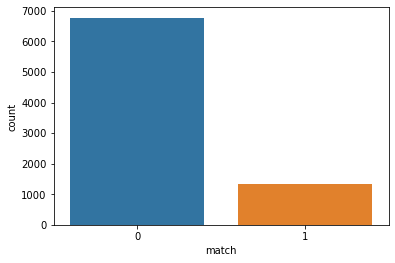

In [144]:
# match: Match (yes/no)
sns.countplot(speed_dating_imputed["match"])
plt.show()

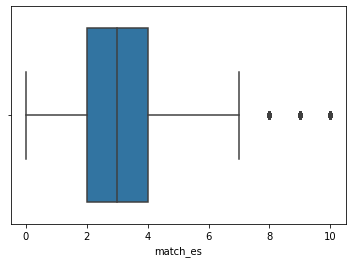

In [145]:
# expectednummatches: How many matches do you expect to get ?
sns.boxplot(speed_dating_imputed["match_es"])
plt.show()

c:\users\imed\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
c:\users\imed\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


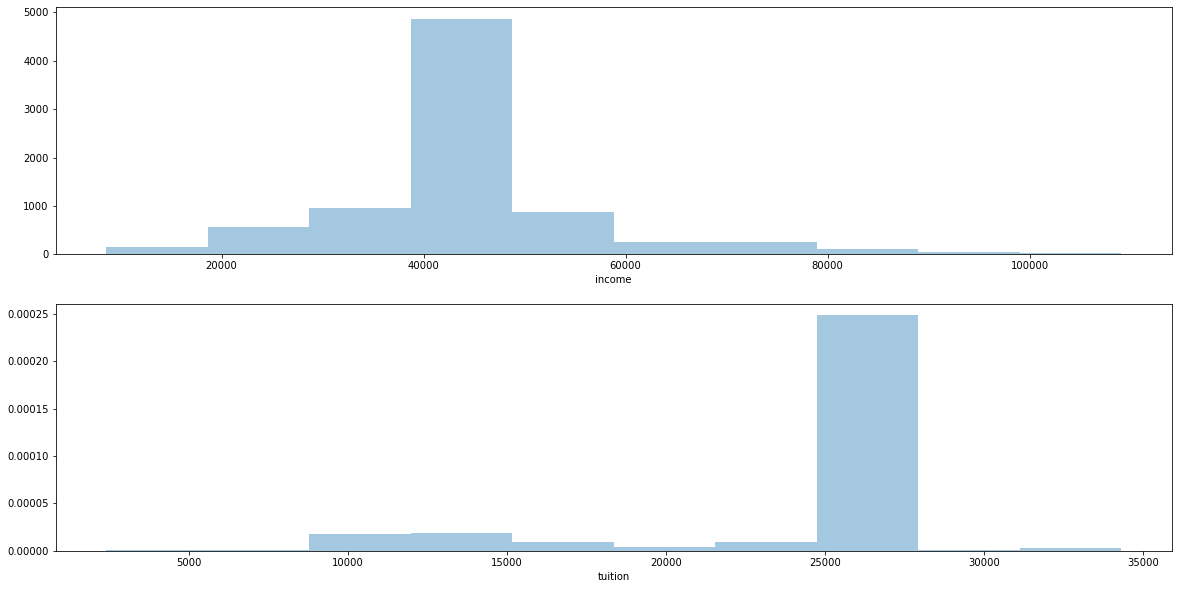

In [146]:
plt.figure(figsize=(20,10))
plt.subplot(211)
sns.distplot(speed_dating_imputed["income"], bins=10, kde=False)
plt.subplot(212)
sns.distplot(speed_dating_imputed["tuition"], bins=10)
plt.show()

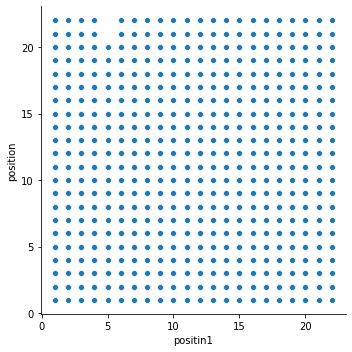

In [147]:
speed_dating_imputed[["positin1", "position"]].corr()
sns.relplot(x = 'positin1' , y = 'position' , data = speed_dating_imputed)
plt.show()

In [148]:
# On retire la variable "positin1"
speed_dating_imputed = speed_dating_imputed.drop("positin1", axis=1)

In [149]:
speed_dating_imputed.shape

(8107, 111)

c:\users\imed\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


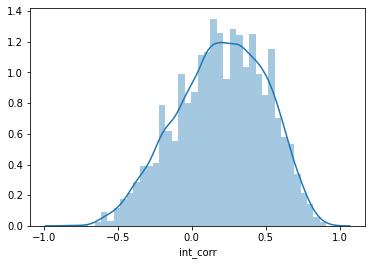

In [151]:
sns.distplot(speed_dating_imputed["int_corr"])
plt.show()

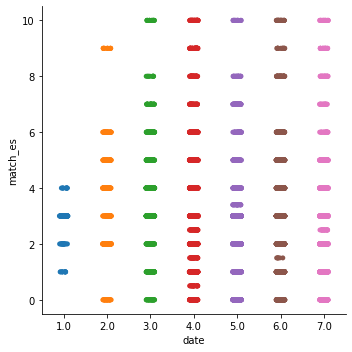

In [152]:
sns.catplot(x="date", y="match_es", data=speed_dating_imputed)
plt.show()

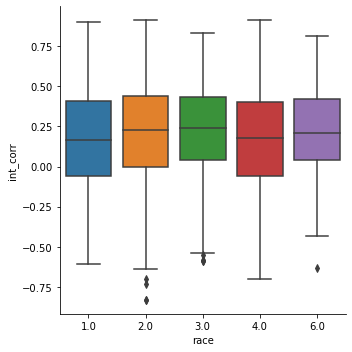

In [153]:
sns.catplot(x="race", y="int_corr", data=speed_dating_imputed, kind='box')
plt.show()

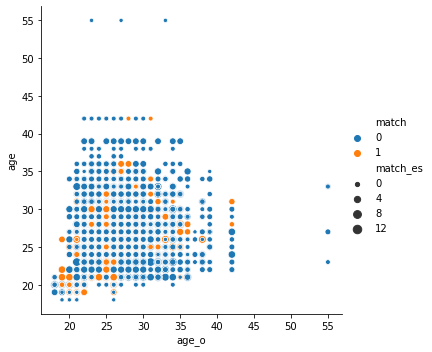

In [155]:
# age: Age of self
# ageo: Age of partner
sns.relplot(x="age_o", y="age", data=speed_dating_imputed, hue="match", size="match_es")
plt.show()

In [156]:
# La variable samerace présente des erreurs, on va rectifier cela avant de retirer les variables race et race_o de notre dataset
index_errors = set(speed_dating_imputed[speed_dating_imputed["race"] == speed_dating_imputed["race_o"]].index) - \
set(speed_dating_imputed[speed_dating_imputed["samerace"] == 1].index)
speed_dating_imputed.loc[index_errors, "samerace"] = 1

In [157]:
speed_dating_imputed = speed_dating_imputed.drop(["race", "race_o"], axis=1)

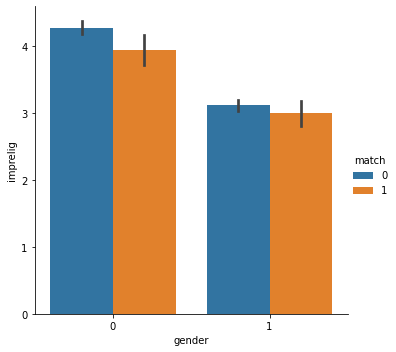

In [158]:
sns.catplot(x="gender", y="imprelig", kind="bar", hue="match", data=speed_dating_imputed)

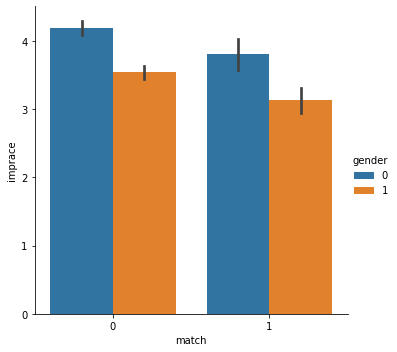

In [159]:
sns.catplot(x="match", y="imprace", kind="bar", hue="gender", data=speed_dating_imputed)

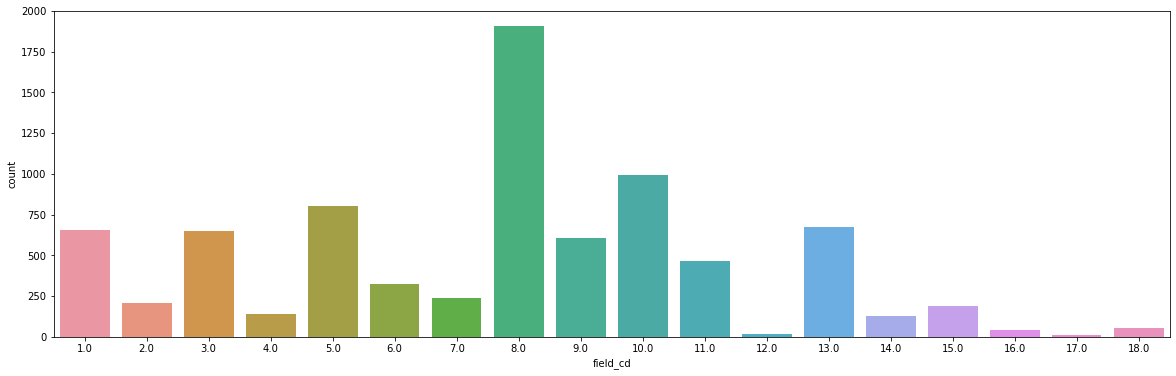

In [160]:
plt.figure(figsize=(20,6))
sns.countplot(speed_dating_imputed['field_cd'])
plt.show()

* prefoattractive: How important does partner rate attractiveness
* prefosinsere: How important does partner rate sincerity
* prefointelligence: How important does partner rate intelligence
* prefofunny: How important does partner rate being funny
* prefoambitious: How important does partner rate ambition
* prefosharedinterests: How important does partner rate having shared interests

c:\users\imed\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


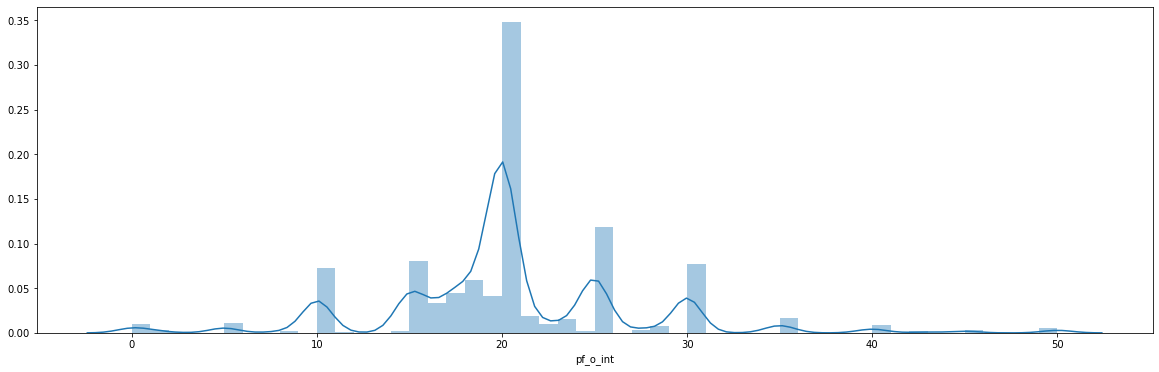

In [161]:
# ['pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha']
plt.figure(figsize=(20,6))
sns.distplot(speed_dating_imputed["pf_o_int"])
plt.show()

* attractiveo: Rating by partner (about me) at night of event on attractiveness
* attractiveimportant: What do you look for in a partner - attractiveness
* attractive: Rate yourself - attractiveness
* attractivepartner: Rate your partner - attractiveness